<a href="https://colab.research.google.com/github/Gholamrezadar/Colab-notebooks/blob/main/Data_Mining_Project_Parkinson_Detectors_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0 - Parkinson Detector Project
DataMining Class spring of 2021

Gholamreza Dar 96405037

6/13/2021

Following Algorithms/methods are used to predict Parkinson's disease

1.   KNN (K nearest neighbours)
2.   SVM (Support vector machines)
3.   Logistic regression
4.   Naive bayes
5.   Decision trees
6.   Random Forest
7.   Neureal networks

section 3 offers a report that compares these methods.





## 1 - Getting the data ready



### Downloading "parkisons.data" file

In [130]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data

--2021-06-13 20:40:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40697 (40K) [application/x-httpd-php]
Saving to: ‘parkinsons.data.2’

parkinsons.data.2   100%[===================>]  39.74K  --.-KB/s    in 0.03s   

2021-06-13 20:40:04 (1.27 MB/s) - ‘parkinsons.data.2’ saved [40697/40697]



### Loading data into pandas dataframe

In [131]:
import pandas as pd
data = pd.read_csv("parkinsons.data")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Seperate input and output (X,Y)

In [132]:
X = data.drop(columns=["name", "status"])
Y = data["status"]
print(len(X.columns), "features")

22 features


In [133]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [134]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

### Seperate train, test 
80% train, 20% test


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=6)

## 2 - Testing different Algorithms


In [136]:
scores = {"KNN":0,
          "SVM":0,
          "Logistic Regression":0,
          "Naive Bayes":0,
          "Decision Tree":0,
          "Random Forest":0,
          "Neural Networks":0}

### 2.1 KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Preprocessing with StandardScaler then KNN 
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
KNN.fit(X, Y)

# result on test dataset
score = KNN.score(X_test, Y_test)
scores["KNN"] = score
print("KNN Score is :", score)

KNN Score is : 0.9743589743589743


### 2.2 SVM

In [138]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Preprocessing with StandardScaler then SVM 
SVM = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=0.0025))
SVM.fit(X, Y)

# result on test dataset
score = SVM.score(X_test, Y_test)
scores["SVM"] = score
print("SVM Score is :", score)

SVM Score is : 0.7948717948717948


### 2.3 Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Preprocessing with StandardScaler then LogisticRegression 
LogReg = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
LogReg.fit(X, Y)

# result on test dataset
score = LogReg.score(X_test, Y_test)
scores["Logistic Regression"] = score
print("Logistic Regression Score is :", score)

Logistic Regression Score is : 0.7692307692307693


### 2.4 Naïve Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Preprocessing with StandardScaler then GaussianNaiveBayes 
NaiveBayes = make_pipeline(StandardScaler(), GaussianNB())
NaiveBayes.fit(X, Y)

# result on test dataset
score = NaiveBayes.score(X_test, Y_test)
scores["Naive Bayes"] = score
print("Naive Bayes Score is :", score)

Naive Bayes Score is : 0.5897435897435898


### 2.5 Decision Tree 

Decision Tree score is 1.0


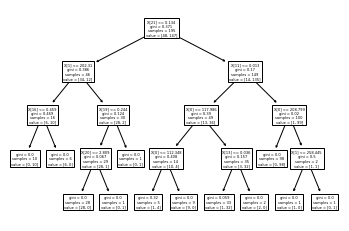

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Preprocessing with StandardScaler then DecisionTreeClassifier 
DecTree = DecisionTreeClassifier(max_depth=4)
DecTree.fit(X, Y)

# result on test dataset
score = DecTree.score(X_test, Y_test)
scores["Decision Tree"] = score
print("Decision Tree score is", score)

tree.plot_tree(DecTree)
plt.show()

In [142]:
print(list(X_train.columns))

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


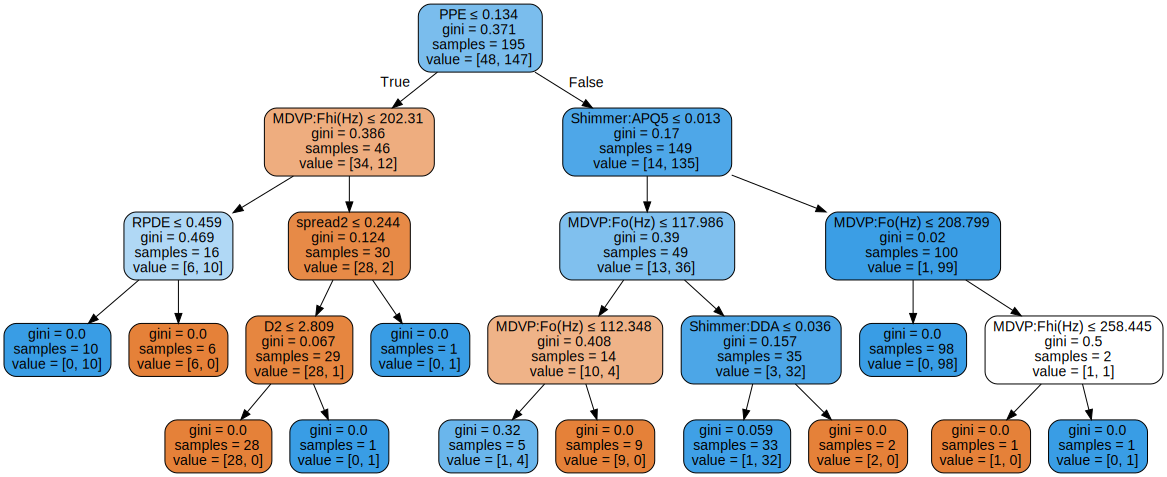

In [143]:
# Visualizing with GraphViz
import graphviz 
dot_data = tree.export_graphviz(DecTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Parkinson") 
dot_data = tree.export_graphviz(DecTree, out_file=None, feature_names=list(X_train.columns),
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### 2.6 Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=4, n_estimators=6, max_features=2)
forest.fit(X, Y)

# result on test dataset
score = forest.score(X_test, Y_test)
scores["Random Forest"] = score
print("Random Forest score is", score)

Random Forest score is 0.8974358974358975


### 2.7 Neural Networks

In [145]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Preprocessing with StandardScaler then MLP 
NN = make_pipeline(StandardScaler(), MLPClassifier(alpha=1, max_iter=1000))
NN.fit(X, Y)

# result on test dataset
score = NN.score(X_test, Y_test)
scores["Neural Networks"] = score
print("Neural Networks Score is :", score)

Neural Networks Score is : 0.9743589743589743


## 3 - Comparisons and final results


In [146]:
list(scores.values())

[0.9743589743589743,
 0.7948717948717948,
 0.7692307692307693,
 0.5897435897435898,
 1.0,
 0.8974358974358975,
 0.9743589743589743]

In [147]:
list(scores.keys())

['KNN',
 'SVM',
 'Logistic Regression',
 'Naive Bayes',
 'Decision Tree',
 'Random Forest',
 'Neural Networks']

In [ ]:
!pip install ing_theme_matplotlib

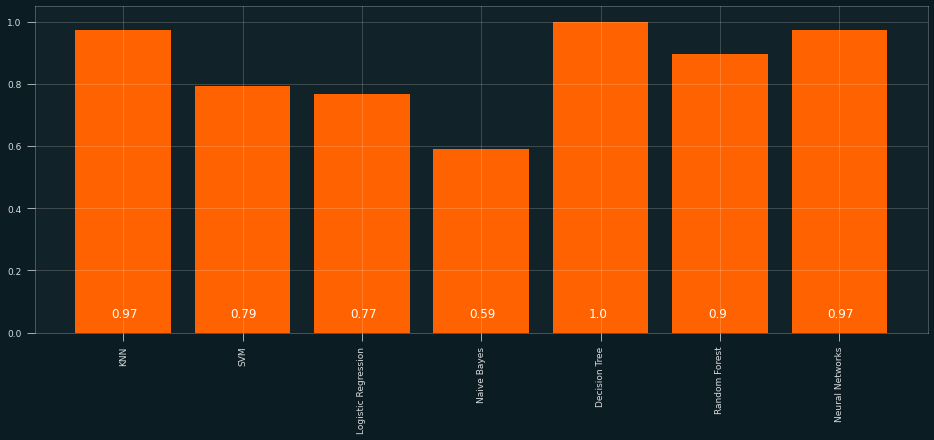

In [179]:
import matplotlib.pyplot as plt
from ing_theme_matplotlib import mpl_style

# styling
plt.rcParams["figure.figsize"] = (16,6)
mpl_style(dark=True)
plt.xticks(rotation=90)

# plotting
plt.bar(list(scores.keys()), list(scores.values()))

# labels
for index,data in enumerate([v.round(2) for v in list(scores.values())]):
    plt.text(x=index-0.1 , y =0.05 , s=f"{data}" , fontdict=dict(fontsize=12))